## Develop a predictive model to forecast future stock prices using historical data and time series analysis techniques.

In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("C:/Users/vedan/OneDrive/Documents/cogenetix/Task 7/Stocks/aapl.us.txt")
df = pd.DataFrame(data)
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [8]:

df["Date"] = pd.to_datetime(df["Date"])

# Sort by date
df = df.sort_values("Date")

# OpenInt drop
df.drop(columns=["OpenInt"], inplace=True)

# Missing values check
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df = df.dropna()

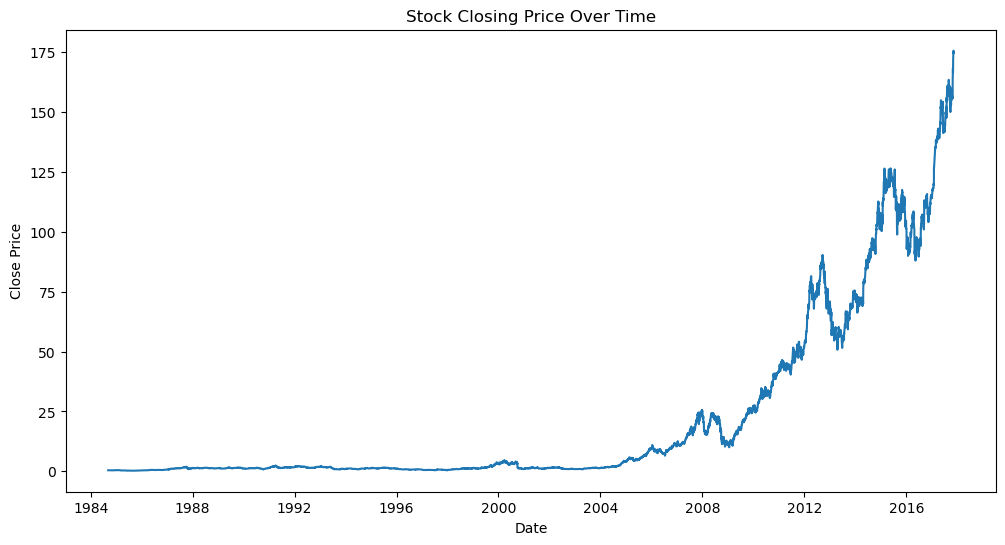

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"])
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [11]:
df["MA20"] = df["Close"].rolling(20).mean()
df["MA50"] = df["Close"].rolling(50).mean()

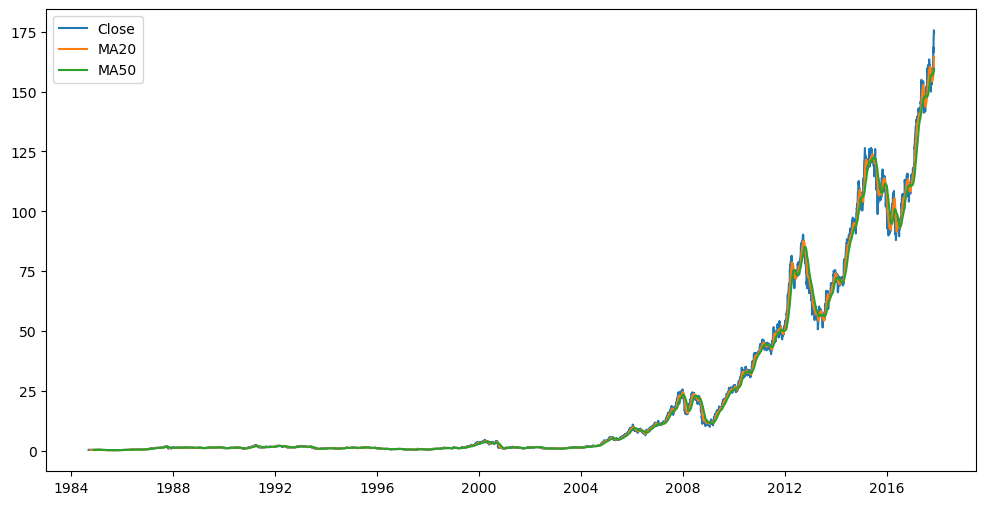

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close")
plt.plot(df["Date"], df["MA20"], label="MA20")
plt.plot(df["Date"], df["MA50"], label="MA50")
plt.legend()
plt.show()

In [13]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test  = df.iloc[train_size:]

In [14]:
#Model Evalution
from sklearn.linear_model import LinearRegression

X_train = train[["Open", "High", "Low", "Volume"]]
y_train = train["Close"]

X_test = test[["Open", "High", "Low", "Volume"]]
y_test = test["Close"]

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [15]:
from sklearn.linear_model import LinearRegression

X_train = train[["Open", "High", "Low", "Volume"]]
y_train = train["Close"]

X_test = test[["Open", "High", "Low", "Volume"]]
y_test = test["Close"]

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

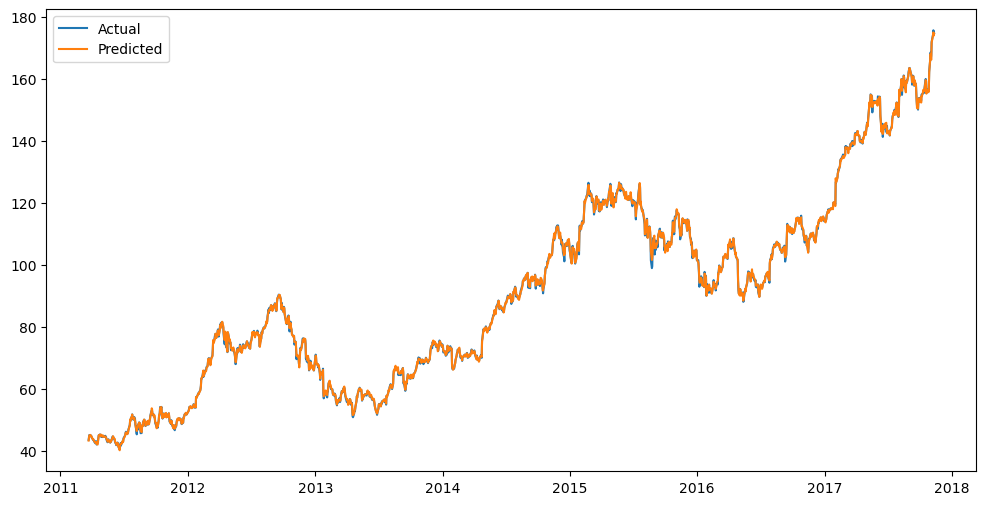

In [16]:
plt.figure(figsize=(12,6))
plt.plot(test["Date"], y_test.values, label="Actual")
plt.plot(test["Date"], y_pred, label="Predicted")
plt.legend()
plt.show()

In [17]:
# Last day data leke
last_day = X_test.tail(1)

predicted_price = lr.predict(last_day)
actual_price = y_test.tail(1).values

predicted_price, actual_price

(array([174.49282923]), array([174.67]))

In [18]:
import joblib

joblib.dump(lr, "stock_price_lr_model.pkl")

['stock_price_lr_model.pkl']